In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2, tempfile, requests
import matplotlib.pyplot as plt
import cv2
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hand = mp.solutions.hands

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

def imread_web(url):
    res = requests.get(url)
    img = None
    with tempfile.NamedTemporaryFile(dir='./') as fp:
        fp.write(res.content)
        fp.file.seek(0)
        img = cv2.imread(fp.name)
    return img

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


左右：L
手首1 0.7017598152160645 0.2844133973121643 6.034470629856514e-07
手首2 0.7665279507637024 0.3881279230117798 -0.026968996971845627
親指：付け根 0.788332998752594 0.5195372700691223 -0.05080832168459892
親指：第1関節 0.7942894697189331 0.6529290080070496 -0.06479228287935257
親指：指先 0.8195239305496216 0.7467910051345825 -0.07771234214305878
人差指：付け根 0.6983434557914734 0.5460371375083923 -0.09301844984292984
人差指：第2関節 0.6709335446357727 0.7289254069328308 -0.1137155294418335
人差指：第1関節 0.6586506366729736 0.8277902603149414 -0.11286110430955887
人差指：指先 0.649512767791748 0.9015284776687622 -0.10872351378202438
中指：付け根 0.6357383728027344 0.5278840661048889 -0.08509238064289093
中指：第2関節 0.5940995216369629 0.7277005910873413 -0.11481805890798569
中指：第1関節 0.5741034150123596 0.8373833894729614 -0.11760714650154114
中指：指先 0.5601911544799805 0.9160391092300415 -0.11543522030115128
薬指：付け根 0.5893376469612122 0.4992610812187195 -0.07239695638418198
薬指：第2関節 0.542482852935791 0.666420578956604 -0.0967547595500946
薬指：第1関節 

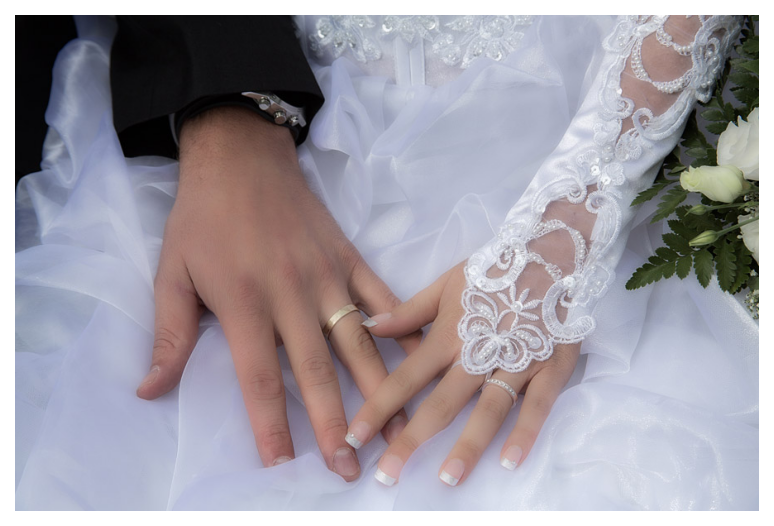

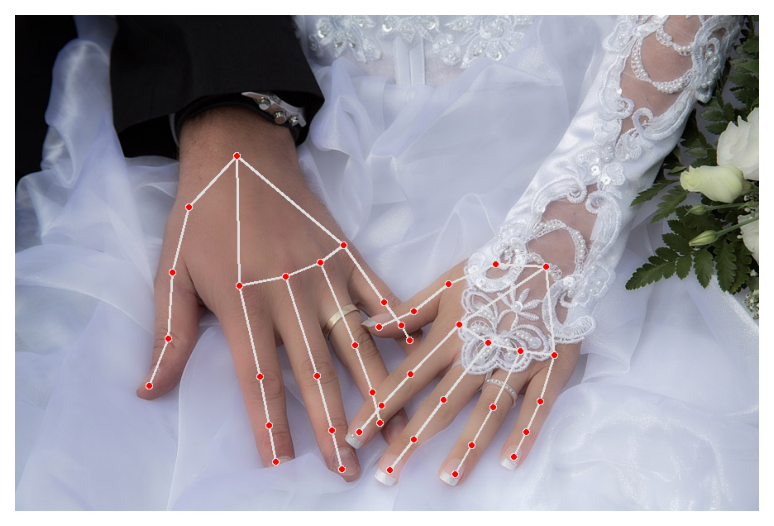

In [38]:
def decode_hands_result(hands_resutl):
    keypoint_index_name = [
        "手首1", "手首2", 
        "親指：付け根", "親指：第1関節", "親指：指先", 
        "人差指：付け根", "人差指：第2関節", "人差指：第1関節", "人差指：指先", 
        "中指：付け根", "中指：第2関節", "中指：第1関節", "中指：指先",
        "薬指：付け根", "薬指：第2関節", "薬指：第1関節", "薬指：指先",
        "小指：付け根", "小指：第2関節", "小指：第1関節", "小指：指先",
    ]

    for num, (hand_landmarks, handedness) in enumerate(zip(hands_resutl.multi_hand_landmarks,
                                                  hands_resutl.multi_handedness), start=1):
        print(f"左右：{handedness.classification[0].label[0]}")
        for i, keypoint in enumerate(hand_landmarks.landmark):
                print(keypoint_index_name[i], keypoint.x, keypoint.y, keypoint.z)
        print()
            
    return None


sample_img_url = "https://gahag.net/img/201606/10s/gahag-0095000804-1.jpg"
img = imread_web(sample_img_url)

show_img(img)

with mp_hand.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    image = cv2.cvtColor(cv2.flip(img, 1), cv2.COLOR_BGR2RGB)
    results = hands.process(image)


    decode_hands_result(results)


    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks, mp_hand.HAND_CONNECTIONS)

    show_img(cv2.flip(image, 1))